In [1]:
from skimage import io, color, morphology
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb

In [2]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

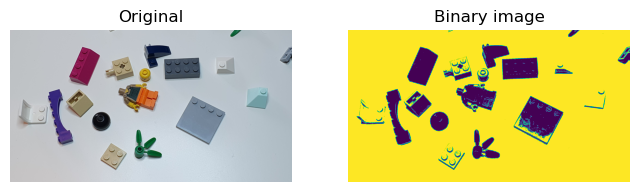

In [4]:
# Read image
img = io.imread('data/lego_4_small.png')

# Convert to grayscale
img_gray = color.rgb2gray(img)

# Apply Otsu's method
thresh = threshold_otsu(img_gray)
img_binary = img_gray > thresh

# Show comparison
show_comparison(img, img_binary, 'Binary image')

In [16]:
# # Remove border BLOBs
# img_blob = segmentation.clear_border(img_binary)

# # Show comparison
# show_comparison(img_binary, img_blob, 'Border BLOBs removed')

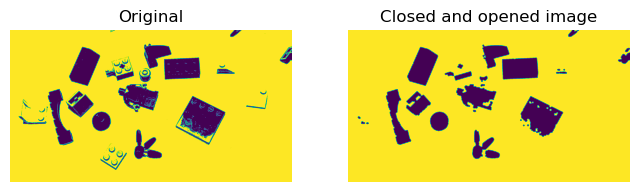

In [19]:
# Close and open image
footprint = morphology.disk(5)
img_closed = morphology.binary_closing(img_binary, footprint)

# Open image
img_opened = morphology.binary_opening(img_closed, footprint)

# Show comparison
show_comparison(img_binary, img_opened, 'Closed and opened image')


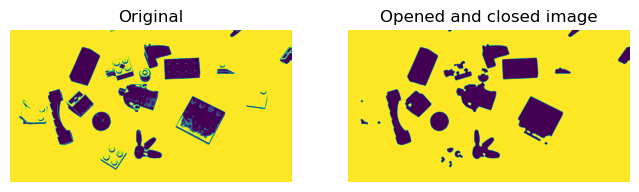

In [25]:
# Open and close image
footprint = morphology.disk(7)
img_opened = morphology.binary_opening(img_binary, footprint)
img_closed = morphology.binary_closing(img_opened, footprint)

# Show comparison
show_comparison(img_binary, img_closed, 'Opened and closed image')

In [26]:
img_morph = img_closed

In [27]:
label_img = measure.label(img_morph)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 6


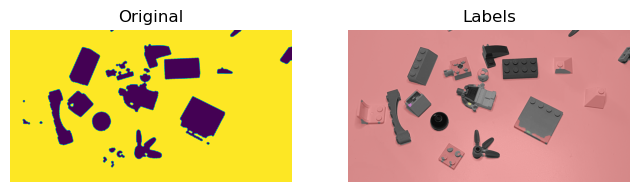

In [28]:
# Visualize labels
img_label_overlay = label2rgb(label_img, image=img)

# Show comparison
show_comparison(img_morph, img_label_overlay, 'Labels')

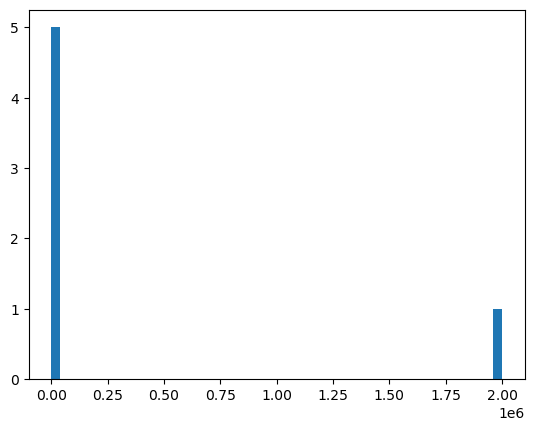

In [29]:
# Compute blob features
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
plt.hist(areas, bins=50)
plt.show()